In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [11]:
import warnings
warnings.filterwarnings("ignore")

## 0. Prepare data

In [2]:
data = pd.read_csv("../data/ageinc_g.csv", index_col = 0)
data.head()

,income,age,gender
0,101743,58,Female
1,49597,27,Female
2,36517,52,Male
3,33223,49,Male
4,72994,53,Female


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  1000 non-null   int64 
 1   age     1000 non-null   int64 
 2   gender  1000 non-null   object
dtypes: int64(2), object(1)
memory usage: 31.2+ KB


In [4]:
n_rows, n_cols = data.shape
print(f"number of rows: {n_rows}")
print(f"number of columns: {n_cols}")

number of rows: 1000
number of columns: 3


## 1. Data cleanning

### Check null values

In [5]:
data.isnull().sum()

income    0
age       0
gender    0
dtype: int64

### Check single variable

Continuous variables (columns):
- `income`
- `age`

In [21]:
continuous_cols = ["income", "age"]
num_continuous_cols = len(continuous_cols)

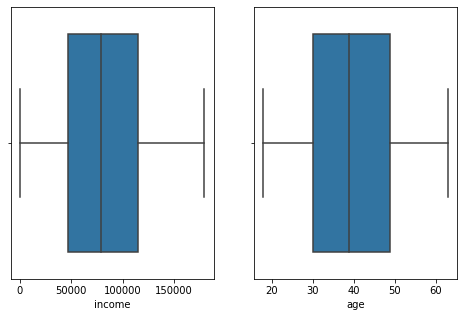

In [12]:
plt.figure(figsize=(8, 5))
for i in range(1, num_continuous_cols + 1):
    plt.subplot(1, num_continuous_cols, i)
    sns.boxplot(data[continuous_cols[i - 1]], orient = "v")
plt.show()

It seem like normal distribution

Categorical columns:
- `gender`

In [14]:
cate_cols = ["gender"]
num_cate_cols = len(cate_cols)

In [17]:
for i in range(num_cate_cols):
    print(f"with column {cate_cols[i]} have:")
    print(data[cate_cols[i]].value_counts())


with column gender have:
Male      511
Female    489
Name: gender, dtype: int64


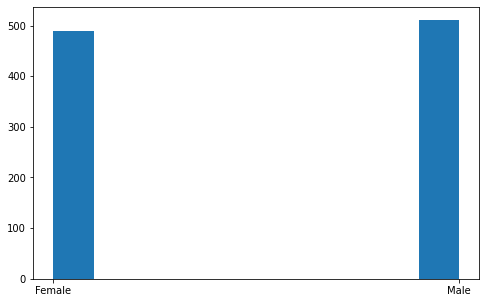

In [19]:
plt.figure(figsize=(8, 5))
for i in range(1, num_cate_cols + 1):
    plt.subplot(1, num_continuous_cols, i)
    plt.hist(data[cate_cols[i-1]])
plt.show()

### Check Gaussian Distribution

Check shape

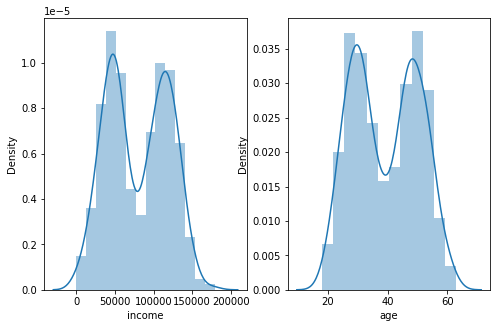

In [23]:
plt.figure(figsize=(8, 5))
for i in range(1, num_continuous_cols + 1):
    plt.subplot(1, num_continuous_cols, i)
    sns.distplot(data[continuous_cols[i - 1]])
plt.show()

get `kurtosis`

In [24]:
data.kurtosis()

income   -1.210079
age      -1.262649
dtype: float64

In [25]:
data.agg(["skew", "kurtosis"]).transpose()

,skew,kurtosis
income,0.028753,-1.210079
age,0.049110,-1.262649


**Conclusion:**
- `income` and `age`  are not gaussian distribution.
- Do not have any outliers
- Data fairly symmertrical


## 2. Data transformation

### Min-Max Scaler

In [26]:
mmScaler = MinMaxScaler()

In [29]:
mmScaler.fit(data[["income", "age"]]) 
data_mmscaler = mmScaler.transform(data[["income", "age"]])

In [31]:
data_mmscaler[:5]

array([[0.56746461, 0.88888889],
       [0.27662387, 0.2       ],
       [0.20367107, 0.75555556],
       [0.18529901, 0.68888889],
       [0.40711903, 0.77777778]])

In [35]:
temp = pd.DataFrame(data_mmscaler, columns = ["mm_income", "mm_age"])
data = pd.concat([data.reset_index(drop = True),
                    temp], axis = 1)

In [36]:
data.head()

,income,age,gender,mm_income,mm_age
0,101743,58,Female,0.567465,0.888889
1,49597,27,Female,0.276624,0.200000
2,36517,52,Male,0.203671,0.755556
3,33223,49,Male,0.185299,0.688889
4,72994,53,Female,0.407119,0.777778


### Explore the cluster

In [32]:
data_dummies = pd.get_dummies(data, drop_first = 1)
data_dummies.head()

,income,age,gender_Male
0,101743,58,0
1,49597,27,0
2,36517,52,1
3,33223,49,1
4,72994,53,0


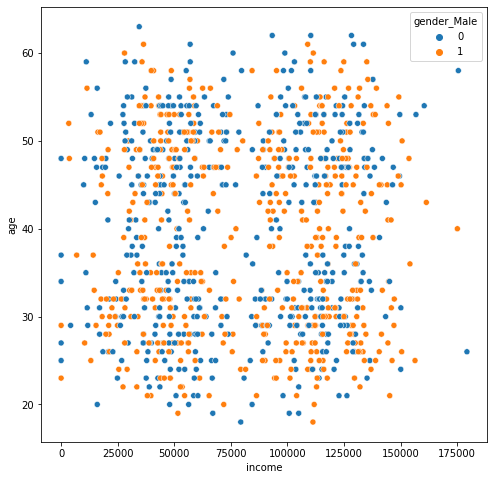

In [34]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = data_dummies, x = "income", y = "age", hue = "gender_Male")
plt.show()

### Optional: visualize 3D


In [37]:
from mpl_toolkits import mplot3d

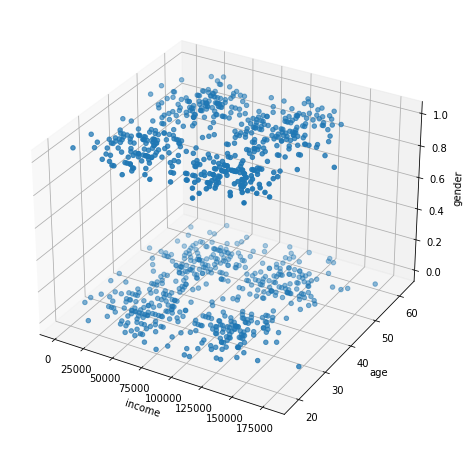

In [38]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(data_dummies.income, data_dummies.age, data_dummies.gender_Male)
ax.set_xlabel('income')
ax.set_ylabel('age')
ax.set_zlabel('gender')

plt.show()